# 뉴스 카테고리 다중분류

- 로이터 데이터를 사용해 다중분류 수행하기
- 이때 사용할 단어의 수를 5000, None, ㅇㅇ로 설정해 성능 비교
- 머신러닝 모델인 나이브 베이즈 분류기, CNB, 로지스틱 회귀, SVM, DT, RF, GBC, Voting을 사용해 성능을 비교하고 최적의 모델 결정하기
- 딥러닝을 사용해 모델을 학습하고 머신러닝 최적 모델과 비교하기


## Import libraries

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## 로이터 뉴스 데이터 단어장 확인

In [2]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [3]:
len(word_index)

30979

단어장에 있는 단어의 개수는 30979개이다. 따라서 5000, 15000, None 으로 num_words를 설정해 실험해볼 것이다

## 데이터 다운로드 및 시각화

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
# 데이터 샘플 출력
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [6]:
# 레이블 출력
print(y_train[0])
print(y_test[0])

3
3


In [7]:
# label 종류 확인
len(set(y_train))

46

### 문장 길이에 따른 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


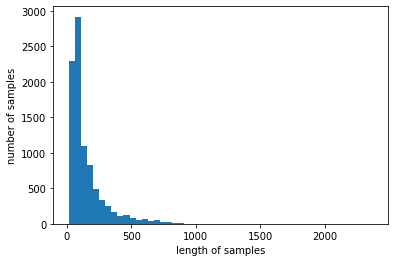

In [8]:
# 데이터 길이 분포
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 클래스 분포 확인

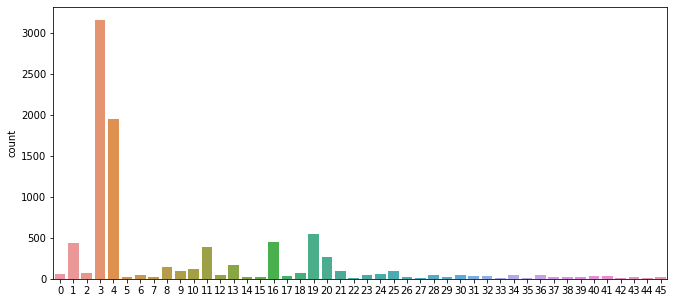

In [9]:
# 클래스 분포 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

3,4 클래스가 대부분을 차지하고 있으며 19,16,1,11등도 높은 분포를 차지하고 있다

## 데이터 벡터화

In [10]:
# x_train 형태 확인
x_train
## x_train은 array([list[], list[]]) 형태임

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 각 리스트 안의 숫자들을 문자열로 변환하여 리스트에 저장
x_train = [' '.join([str(word) for word in doc]) for doc in x_train]

# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)


In [13]:
# tf-idf 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 28130)


In [14]:
# test 데이터에 대해서도 적용
x_test = [' '.join([str(word) for word in doc]) for doc in x_test]
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-IDF 행렬로 변환


## 전체 단어사전을 사용한 경우 머신러닝 모델 학습
- 나이브베이즈, CNB, LR, SVM, DT, RF, GBT, Voting을 통해 각각의 데이터를 학습하고 정밀도 (Precision), 재현율 (Recall), F1 스코어를 통해 모델의 성능을 평가할 것이다.데이터 라벨의 분포가 불균형하기 때문이다

In [22]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

In [23]:
def predict_model(model, tfidfv_test, y_test):
    predicted = model.predict(tfidfv_test)
    acc_score =  accuracy_score(y_test, predicted)
    f1_scores = f1_score(y_test, predicted, average=None)
    print("정확도:", accuracy_score(y_test, predicted))
    for class_idx, f1 in enumerate(f1_scores):
        print(f"Class {class_idx}: F1 Score = {f1:.2f}")
    return acc_score, f1_scores
    
    

### NB

In [24]:
nb_model = MultinomialNB()
nb_history = nb_model.fit(tfidfv, y_train)

In [25]:
nb_acc, nb_f1 = predict_model(nb_model, tfidfv_test, y_test)

정확도: 0.6104185218165628
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.40
Class 2: F1 Score = 0.00
Class 3: F1 Score = 0.80
Class 4: F1 Score = 0.64
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.00
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.00
Class 10: F1 Score = 0.00
Class 11: F1 Score = 0.50
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.33
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.66
Class 20: F1 Score = 0.00
Class 21: F1 Score = 0.00
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.00
Class 25: F1 Score = 0.00
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.00
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

나이브 베이즈 모델의 경우 데이터 수가 많은 class 1, 3, 4, 19에 데이터 수가 많을수록 좋은 f1 score 값을 보여주지만 데이터 수가 적은 경우 0으로 무의미한 값을 갖는다

### CNB

In [26]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [28]:

cb_acc, cb_f1 = predict_model(cb, tfidfv_test, y_test)

정확도: 0.7600178094390027
Class 0: F1 Score = 0.60
Class 1: F1 Score = 0.72
Class 2: F1 Score = 0.65
Class 3: F1 Score = 0.88
Class 4: F1 Score = 0.84
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.89
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.17
Class 9: F1 Score = 0.85
Class 10: F1 Score = 0.81
Class 11: F1 Score = 0.62
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.59
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.18
Class 16: F1 Score = 0.71
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.44
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.36
Class 21: F1 Score = 0.64
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.53
Class 24: F1 Score = 0.18
Class 25: F1 Score = 0.72
Class 26: F1 Score = 0.93
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.15
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.27
Class 32: F1 Score = 0.89
Class 33: F1 Score = 0.89
Class 34: F1 Score = 0.60
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

CMB는 나이브 베이즈 모델과 비교했을 때에 비해 데이터 불균형을 잘 해결한 상태로 nb에 비해 정확도가 높고 여러 클래스에 대해 f1 score가 비교적 높다.

### ### 로지스틱 회귀(Logistic Regression)


In [29]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [30]:

lr_acc, lr_f1 = predict_model(lr, tfidfv_test, y_test)

정확도: 0.8107747105966162
Class 0: F1 Score = 0.76
Class 1: F1 Score = 0.77
Class 2: F1 Score = 0.75
Class 3: F1 Score = 0.92
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.33
Class 6: F1 Score = 0.93
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.69
Class 9: F1 Score = 0.86
Class 10: F1 Score = 0.90
Class 11: F1 Score = 0.70
Class 12: F1 Score = 0.55
Class 13: F1 Score = 0.64
Class 14: F1 Score = 0.50
Class 15: F1 Score = 0.57
Class 16: F1 Score = 0.75
Class 17: F1 Score = 0.73
Class 18: F1 Score = 0.72
Class 19: F1 Score = 0.70
Class 20: F1 Score = 0.52
Class 21: F1 Score = 0.75
Class 22: F1 Score = 0.25
Class 23: F1 Score = 0.64
Class 24: F1 Score = 0.57
Class 25: F1 Score = 0.81
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.40
Class 28: F1 Score = 0.35
Class 29: F1 Score = 0.73
Class 30: F1 Score = 0.67
Class 31: F1 Score = 0.64
Class 32: F1 Score = 0.95
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.67
Class 35: F1 Score = 0.50
Class 36: F1 Score = 0.33
Class 37: F1 Score = 0.5

정확도가 약 0.81로 지금까지의 모델들 중 가장 높은 성능을 보인다

### 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [31]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

lsvc_acc, lsvc_f1 = predict_model(lsvc, tfidfv_test, y_test)

정확도: 0.7938557435440784
Class 0: F1 Score = 0.76
Class 1: F1 Score = 0.76
Class 2: F1 Score = 0.77
Class 3: F1 Score = 0.91
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.29
Class 6: F1 Score = 0.97
Class 7: F1 Score = 0.40
Class 8: F1 Score = 0.64
Class 9: F1 Score = 0.85
Class 10: F1 Score = 0.86
Class 11: F1 Score = 0.70
Class 12: F1 Score = 0.42
Class 13: F1 Score = 0.53
Class 14: F1 Score = 0.50
Class 15: F1 Score = 0.47
Class 16: F1 Score = 0.70
Class 17: F1 Score = 0.60
Class 18: F1 Score = 0.70
Class 19: F1 Score = 0.65
Class 20: F1 Score = 0.46
Class 21: F1 Score = 0.69
Class 22: F1 Score = 0.18
Class 23: F1 Score = 0.61
Class 24: F1 Score = 0.61
Class 25: F1 Score = 0.75
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.67
Class 28: F1 Score = 0.50
Class 29: F1 Score = 0.53
Class 30: F1 Score = 0.56
Class 31: F1 Score = 0.73
Class 32: F1 Score = 0.95
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.67
Class 35: F1 Score = 0.25
Class 36: F1 Score = 0.67
Class 37: F1 Score = 0.4

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 결정 트리(Decision Tree)

In [32]:
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv, y_train)

dt_acc, dt_f1 = predict_model(dt, tfidfv_test, y_test)

정확도: 0.6175422974176313
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.54
Class 2: F1 Score = 0.55
Class 3: F1 Score = 0.70
Class 4: F1 Score = 0.73
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.00
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.27
Class 10: F1 Score = 0.88
Class 11: F1 Score = 0.61
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.69
Class 17: F1 Score = 0.24
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.49
Class 20: F1 Score = 0.05
Class 21: F1 Score = 0.07
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.09
Class 25: F1 Score = 0.30
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.17
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.75
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

### 랜덤 포레스트(Random Forest)


In [33]:
rf = RandomForestClassifier(n_estimators=5, random_state=0)
rf.fit(tfidfv, y_train)

rf_acc, rf_f1 = predict_model(rf, tfidfv_test, y_test)


정확도: 0.6433659839715049
Class 0: F1 Score = 0.19
Class 1: F1 Score = 0.45
Class 2: F1 Score = 0.17
Class 3: F1 Score = 0.84
Class 4: F1 Score = 0.68
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.43
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.51
Class 9: F1 Score = 0.32
Class 10: F1 Score = 0.15
Class 11: F1 Score = 0.54
Class 12: F1 Score = 0.19
Class 13: F1 Score = 0.25
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.49
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.33
Class 19: F1 Score = 0.63
Class 20: F1 Score = 0.40
Class 21: F1 Score = 0.41
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.17
Class 25: F1 Score = 0.36
Class 26: F1 Score = 0.22
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.17
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.29
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.18
Class 33: F1 Score = 0.57
Class 34: F1 Score = 0.22
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.27
Class 37: F1 Score = 0.0

### 그래디언트 부스팅 트리(GradientBoostingClassifier)


In [34]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [35]:

grbt_acc, grbt_f1 = predict_model(grbt, tfidfv_test, y_test)


정확도: 0.7707034728406055
Class 0: F1 Score = 0.58
Class 1: F1 Score = 0.70
Class 2: F1 Score = 0.67
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.81
Class 5: F1 Score = 0.36
Class 6: F1 Score = 0.93
Class 7: F1 Score = 0.67
Class 8: F1 Score = 0.60
Class 9: F1 Score = 0.86
Class 10: F1 Score = 0.88
Class 11: F1 Score = 0.63
Class 12: F1 Score = 0.50
Class 13: F1 Score = 0.53
Class 14: F1 Score = 0.22
Class 15: F1 Score = 0.14
Class 16: F1 Score = 0.75
Class 17: F1 Score = 0.42
Class 18: F1 Score = 0.43
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.52
Class 21: F1 Score = 0.58
Class 22: F1 Score = 0.40
Class 23: F1 Score = 0.43
Class 24: F1 Score = 0.50
Class 25: F1 Score = 0.80
Class 26: F1 Score = 0.93
Class 27: F1 Score = 0.67
Class 28: F1 Score = 0.22
Class 29: F1 Score = 0.55
Class 30: F1 Score = 0.45
Class 31: F1 Score = 0.38
Class 32: F1 Score = 0.95
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.40
Class 35: F1 Score = 0.22
Class 36: F1 Score = 0.52
Class 37: F1 Score = 0.4

### 보팅(Voting)


In [41]:
vt = VotingClassifier(
    estimators=[('cb', cb), ('dt', dt), ('rf', rf), ('grbt', grbt)],
    voting='soft'
)

vt.fit(tfidfv, y_train)

vt_acc, vt_f1 = predict_model(vt, tfidfv_test, y_test)


정확도: 0.7742653606411398
Class 0: F1 Score = 0.64
Class 1: F1 Score = 0.71
Class 2: F1 Score = 0.67
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.79
Class 5: F1 Score = 0.29
Class 6: F1 Score = 0.75
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.62
Class 9: F1 Score = 0.90
Class 10: F1 Score = 0.89
Class 11: F1 Score = 0.68
Class 12: F1 Score = 0.50
Class 13: F1 Score = 0.48
Class 14: F1 Score = 0.25
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.74
Class 17: F1 Score = 0.42
Class 18: F1 Score = 0.47
Class 19: F1 Score = 0.68
Class 20: F1 Score = 0.50
Class 21: F1 Score = 0.57
Class 22: F1 Score = 0.40
Class 23: F1 Score = 0.43
Class 24: F1 Score = 0.47
Class 25: F1 Score = 0.79
Class 26: F1 Score = 0.93
Class 27: F1 Score = 0.40
Class 28: F1 Score = 0.22
Class 29: F1 Score = 0.55
Class 30: F1 Score = 0.48
Class 31: F1 Score = 0.42
Class 32: F1 Score = 0.95
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.40
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.54
Class 37: F1 Score = 0.6

### 각각의 acc, f1 저장

In [42]:
model_index = ["NaiveBayes", "Complement Naive Bayes", "Logistic Regression", "LinearSVM", "DecisionTree", "RandomForest", "GradientBoosting", "Voting"]
acc_score_lst = [nb_acc, cb_acc, lr_acc, lsvc_acc, dt_acc, rf_acc, grbt_acc, vt_acc]
f1_score_lst = [nb_f1,cb_f1, lr_f1, lsvc_f1, dt_f1, rf_f1, grbt_f1, vt_f1]
print(acc_score_lst)
print(f1_score_lst)

[0.6104185218165628, 0.7600178094390027, 0.8107747105966162, 0.7938557435440784, 0.6175422974176313, 0.6433659839715049, 0.7707034728406055, 0.7742653606411398]
[array([0.        , 0.40277778, 0.        , 0.79619852, 0.64164306,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5       , 0.        , 0.        , 0.        ,
       0.        , 0.3255814 , 0.        , 0.        , 0.66141732,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([0.6       , 0.72131148, 0.64516129, 0.8758093 , 0.83587786,
       0.        , 0.88888889, 0.8       , 0.17391304, 0.84615385,
       0.80769231, 0.62032086, 0.        , 0.58823529, 0.        ,
       0.1818

In [46]:
df_acc = pd.DataFrame([acc_score_lst], columns=model_index)
df_acc.to_csv("acc_None.csv", index=False)

df_f1 = pd.DataFrame([f1_score_lst], columns=model_index)
df_f1.to_csv("f1_None.csv")



## 5000개 단어를 사용한 단어사전으로 학습

In [47]:

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [48]:

# 각 리스트 안의 숫자들을 문자열로 변환하여 리스트에 저장
x_train = [' '.join([str(word) for word in doc]) for doc in x_train]

# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

# tf-idf 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4990)


In [49]:
# test 데이터에 대해서도 적용
x_test = [' '.join([str(word) for word in doc]) for doc in x_test]
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-IDF 행렬로 변환


In [50]:
nb_model = MultinomialNB()
nb_history = nb_model.fit(tfidfv, y_train)
nb_acc, nb_f1 = predict_model(nb_model, tfidfv_test, y_test)

정확도: 0.6843276936776491
Class 0: F1 Score = 0.50
Class 1: F1 Score = 0.62
Class 2: F1 Score = 0.00
Class 3: F1 Score = 0.86
Class 4: F1 Score = 0.76
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.00
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.61
Class 10: F1 Score = 0.12
Class 11: F1 Score = 0.58
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.34
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.65
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.62
Class 20: F1 Score = 0.21
Class 21: F1 Score = 0.14
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.00
Class 25: F1 Score = 0.18
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.00
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

전체 단어사전을 사용했을 경우 정확도는 0.6104185218165628이었는데 5000개 단어만 사용했을 경우 정확도는 약 0.68이다. naivebayes 모델의 경우 5000개 단어를 사용했을 때의 정확도가 더 높다.

In [51]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
cb_acc, cb_f1 = predict_model(cb, tfidfv_test, y_test)

정확도: 0.7742653606411398
Class 0: F1 Score = 0.67
Class 1: F1 Score = 0.73
Class 2: F1 Score = 0.65
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.86
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.42
Class 9: F1 Score = 0.88
Class 10: F1 Score = 0.87
Class 11: F1 Score = 0.64
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.64
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.72
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.59
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.40
Class 21: F1 Score = 0.71
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.60
Class 24: F1 Score = 0.18
Class 25: F1 Score = 0.85
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.25
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.27
Class 32: F1 Score = 0.82
Class 33: F1 Score = 0.89
Class 34: F1 Score = 0.83
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.6

In [52]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
lr_acc, lr_f1 = predict_model(lr, tfidfv_test, y_test)

정확도: 0.8000890471950134
Class 0: F1 Score = 0.76
Class 1: F1 Score = 0.74
Class 2: F1 Score = 0.76
Class 3: F1 Score = 0.92
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.89
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.68
Class 9: F1 Score = 0.82
Class 10: F1 Score = 0.86
Class 11: F1 Score = 0.69
Class 12: F1 Score = 0.55
Class 13: F1 Score = 0.63
Class 14: F1 Score = 0.50
Class 15: F1 Score = 0.46
Class 16: F1 Score = 0.72
Class 17: F1 Score = 0.76
Class 18: F1 Score = 0.72
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.51
Class 21: F1 Score = 0.75
Class 22: F1 Score = 0.25
Class 23: F1 Score = 0.64
Class 24: F1 Score = 0.56
Class 25: F1 Score = 0.76
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.40
Class 28: F1 Score = 0.40
Class 29: F1 Score = 0.73
Class 30: F1 Score = 0.67
Class 31: F1 Score = 0.70
Class 32: F1 Score = 0.89
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.67
Class 35: F1 Score = 0.50
Class 36: F1 Score = 0.40
Class 37: F1 Score = 0.5

In [53]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

lsvc_acc, lsvc_f1 = predict_model(lsvc, tfidfv_test, y_test)

정확도: 0.7804986642920748
Class 0: F1 Score = 0.73
Class 1: F1 Score = 0.73
Class 2: F1 Score = 0.71
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.82
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.89
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.61
Class 9: F1 Score = 0.82
Class 10: F1 Score = 0.86
Class 11: F1 Score = 0.70
Class 12: F1 Score = 0.50
Class 13: F1 Score = 0.62
Class 14: F1 Score = 0.80
Class 15: F1 Score = 0.46
Class 16: F1 Score = 0.66
Class 17: F1 Score = 0.53
Class 18: F1 Score = 0.71
Class 19: F1 Score = 0.63
Class 20: F1 Score = 0.44
Class 21: F1 Score = 0.63
Class 22: F1 Score = 0.36
Class 23: F1 Score = 0.62
Class 24: F1 Score = 0.67
Class 25: F1 Score = 0.71
Class 26: F1 Score = 0.82
Class 27: F1 Score = 0.57
Class 28: F1 Score = 0.50
Class 29: F1 Score = 0.62
Class 30: F1 Score = 0.63
Class 31: F1 Score = 0.70
Class 32: F1 Score = 0.90
Class 33: F1 Score = 0.73
Class 34: F1 Score = 0.67
Class 35: F1 Score = 0.50
Class 36: F1 Score = 0.50
Class 37: F1 Score = 0.4

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv, y_train)

dt_acc, dt_f1 = predict_model(dt, tfidfv_test, y_test)

정확도: 0.6219946571682992
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.52
Class 2: F1 Score = 0.48
Class 3: F1 Score = 0.87
Class 4: F1 Score = 0.72
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.60
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.88
Class 10: F1 Score = 0.87
Class 11: F1 Score = 0.58
Class 12: F1 Score = 0.12
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.68
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.30
Class 20: F1 Score = 0.10
Class 21: F1 Score = 0.00
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.09
Class 25: F1 Score = 0.34
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.75
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

In [55]:
rf = RandomForestClassifier(n_estimators=5, random_state=0)
rf.fit(tfidfv, y_train)

rf_acc, rf_f1 = predict_model(rf, tfidfv_test, y_test)


정확도: 0.6883348174532502
Class 0: F1 Score = 0.51
Class 1: F1 Score = 0.53
Class 2: F1 Score = 0.27
Class 3: F1 Score = 0.86
Class 4: F1 Score = 0.74
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.53
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.60
Class 9: F1 Score = 0.54
Class 10: F1 Score = 0.31
Class 11: F1 Score = 0.56
Class 12: F1 Score = 0.24
Class 13: F1 Score = 0.38
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.62
Class 17: F1 Score = 0.15
Class 18: F1 Score = 0.30
Class 19: F1 Score = 0.64
Class 20: F1 Score = 0.42
Class 21: F1 Score = 0.53
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.24
Class 25: F1 Score = 0.67
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.33
Class 33: F1 Score = 0.57
Class 34: F1 Score = 0.20
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.27
Class 37: F1 Score = 0.0

In [56]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
grbt_acc, grbt_f1 = predict_model(grbt, tfidfv_test, y_test)


정확도: 0.0008904719501335708
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.00
Class 2: F1 Score = 0.00
Class 3: F1 Score = 0.00
Class 4: F1 Score = 0.00
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.00
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.00
Class 10: F1 Score = 0.00
Class 11: F1 Score = 0.00
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.00
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.00
Class 20: F1 Score = 0.00
Class 21: F1 Score = 0.00
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.00
Class 25: F1 Score = 0.00
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.00
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 

In [57]:
vt = VotingClassifier(
    estimators=[('cb', cb), ('dt', dt), ('rf', rf), ('grbt', grbt)],
    voting='soft'
)

vt.fit(tfidfv, y_train)

vt_acc, vt_f1 = predict_model(vt, tfidfv_test, y_test)


정확도: 0.6019590382902938
Class 0: F1 Score = 0.29
Class 1: F1 Score = 0.57
Class 2: F1 Score = 0.50
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.78
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.35
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.23
Class 9: F1 Score = 0.87
Class 10: F1 Score = 0.76
Class 11: F1 Score = 0.57
Class 12: F1 Score = 0.12
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.74
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.47
Class 20: F1 Score = 0.15
Class 21: F1 Score = 0.07
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.09
Class 25: F1 Score = 0.32
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.18
Class 33: F1 Score = 0.75
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

In [58]:
model_index = ["NaiveBayes", "Complement Naive Bayes", "Logistic Regression", "LinearSVM", "DecisionTree", "RandomForest", "GradientBoosting", "Voting"]
acc_score_lst = [nb_acc, cb_acc, lr_acc, lsvc_acc, dt_acc, rf_acc, grbt_acc, vt_acc]
f1_score_lst = [nb_f1,cb_f1, lr_f1, lsvc_f1, dt_f1, rf_f1, grbt_f1, vt_f1]
print(acc_score_lst)
print(f1_score_lst)

[0.6843276936776491, 0.7742653606411398, 0.8000890471950134, 0.7804986642920748, 0.6219946571682992, 0.6883348174532502, 0.0008904719501335708, 0.6019590382902938]
[array([0.5       , 0.62271062, 0.        , 0.86172107, 0.76239316,
       0.        , 0.        , 0.        , 0.        , 0.61111111,
       0.125     , 0.5754717 , 0.        , 0.34042553, 0.        ,
       0.        , 0.64888889, 0.        , 0.        , 0.62247839,
       0.20512821, 0.13793103, 0.        , 0.        , 0.        ,
       0.17647059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([0.66666667, 0.72874494, 0.64516129, 0.8995687 , 0.83033175,
       0.        , 0.85714286, 0.8       , 0.42105263, 0.88461538,
       0.87272727, 0.64      , 0.        , 0.63768116, 0.        ,
       0. 

In [60]:
df_acc = pd.DataFrame([acc_score_lst], columns=model_index)
df_acc.to_csv("acc_5000.csv", index=False)

df_f1 = pd.DataFrame([f1_score_lst], columns=model_index)
df_f1.to_csv("f1_5000.csv")



## 15000개 단어를 사용한 단어사전으로 학습

In [61]:

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [62]:

# 각 리스트 안의 숫자들을 문자열로 변환하여 리스트에 저장
x_train = [' '.join([str(word) for word in doc]) for doc in x_train]

# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

# tf-idf 행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 14793)


In [63]:

# test 데이터에 대해서도 적용
x_test = [' '.join([str(word) for word in doc]) for doc in x_test]
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-IDF 행렬로 변환


In [64]:
nb_model = MultinomialNB()
nb_history = nb_model.fit(tfidfv, y_train)
nb_acc, nb_f1 = predict_model(nb_model, tfidfv_test, y_test)

정확도: 0.6469278717720391
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.65
Class 2: F1 Score = 0.00
Class 3: F1 Score = 0.82
Class 4: F1 Score = 0.67
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.00
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.08
Class 10: F1 Score = 0.00
Class 11: F1 Score = 0.60
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.58
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.68
Class 20: F1 Score = 0.06
Class 21: F1 Score = 0.00
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.00
Class 25: F1 Score = 0.00
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.00
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.00
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

In [65]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
cb_acc, cb_f1 = predict_model(cb, tfidfv_test, y_test)

정확도: 0.7751558325912734
Class 0: F1 Score = 0.73
Class 1: F1 Score = 0.74
Class 2: F1 Score = 0.65
Class 3: F1 Score = 0.89
Class 4: F1 Score = 0.85
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.93
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.27
Class 9: F1 Score = 0.87
Class 10: F1 Score = 0.85
Class 11: F1 Score = 0.62
Class 12: F1 Score = 0.00
Class 13: F1 Score = 0.60
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.18
Class 16: F1 Score = 0.72
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.56
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.41
Class 21: F1 Score = 0.67
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.73
Class 24: F1 Score = 0.17
Class 25: F1 Score = 0.79
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.40
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.38
Class 32: F1 Score = 0.89
Class 33: F1 Score = 0.89
Class 34: F1 Score = 0.83
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

In [66]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
lr_acc, lr_f1 = predict_model(lr, tfidfv_test, y_test)

정확도: 0.8085485307212823
Class 0: F1 Score = 0.76
Class 1: F1 Score = 0.76
Class 2: F1 Score = 0.75
Class 3: F1 Score = 0.92
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.33
Class 6: F1 Score = 0.93
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.69
Class 9: F1 Score = 0.86
Class 10: F1 Score = 0.90
Class 11: F1 Score = 0.69
Class 12: F1 Score = 0.55
Class 13: F1 Score = 0.62
Class 14: F1 Score = 0.50
Class 15: F1 Score = 0.57
Class 16: F1 Score = 0.75
Class 17: F1 Score = 0.73
Class 18: F1 Score = 0.70
Class 19: F1 Score = 0.69
Class 20: F1 Score = 0.51
Class 21: F1 Score = 0.75
Class 22: F1 Score = 0.25
Class 23: F1 Score = 0.64
Class 24: F1 Score = 0.57
Class 25: F1 Score = 0.79
Class 26: F1 Score = 0.93
Class 27: F1 Score = 0.40
Class 28: F1 Score = 0.35
Class 29: F1 Score = 0.73
Class 30: F1 Score = 0.67
Class 31: F1 Score = 0.64
Class 32: F1 Score = 0.95
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.73
Class 35: F1 Score = 0.50
Class 36: F1 Score = 0.42
Class 37: F1 Score = 0.5

In [67]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

lsvc_acc, lsvc_f1 = predict_model(lsvc, tfidfv_test, y_test)

정확도: 0.7853962600178095
Class 0: F1 Score = 0.73
Class 1: F1 Score = 0.73
Class 2: F1 Score = 0.72
Class 3: F1 Score = 0.91
Class 4: F1 Score = 0.83
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.87
Class 7: F1 Score = 0.40
Class 8: F1 Score = 0.63
Class 9: F1 Score = 0.84
Class 10: F1 Score = 0.81
Class 11: F1 Score = 0.66
Class 12: F1 Score = 0.50
Class 13: F1 Score = 0.56
Class 14: F1 Score = 0.80
Class 15: F1 Score = 0.29
Class 16: F1 Score = 0.70
Class 17: F1 Score = 0.70
Class 18: F1 Score = 0.63
Class 19: F1 Score = 0.64
Class 20: F1 Score = 0.44
Class 21: F1 Score = 0.68
Class 22: F1 Score = 0.22
Class 23: F1 Score = 0.64
Class 24: F1 Score = 0.61
Class 25: F1 Score = 0.75
Class 26: F1 Score = 0.88
Class 27: F1 Score = 0.67
Class 28: F1 Score = 0.38
Class 29: F1 Score = 0.46
Class 30: F1 Score = 0.44
Class 31: F1 Score = 0.67
Class 32: F1 Score = 0.84
Class 33: F1 Score = 0.83
Class 34: F1 Score = 0.73
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.50
Class 37: F1 Score = 0.5

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [68]:
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv, y_train)

dt_acc, dt_f1 = predict_model(dt, tfidfv_test, y_test)

정확도: 0.6130899376669635
Class 0: F1 Score = 0.00
Class 1: F1 Score = 0.53
Class 2: F1 Score = 0.55
Class 3: F1 Score = 0.70
Class 4: F1 Score = 0.72
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.60
Class 7: F1 Score = 0.00
Class 8: F1 Score = 0.00
Class 9: F1 Score = 0.27
Class 10: F1 Score = 0.88
Class 11: F1 Score = 0.61
Class 12: F1 Score = 0.12
Class 13: F1 Score = 0.00
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.66
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.00
Class 19: F1 Score = 0.48
Class 20: F1 Score = 0.05
Class 21: F1 Score = 0.07
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.00
Class 24: F1 Score = 0.10
Class 25: F1 Score = 0.29
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.17
Class 29: F1 Score = 0.00
Class 30: F1 Score = 0.00
Class 31: F1 Score = 0.00
Class 32: F1 Score = 0.00
Class 33: F1 Score = 0.75
Class 34: F1 Score = 0.00
Class 35: F1 Score = 0.00
Class 36: F1 Score = 0.00
Class 37: F1 Score = 0.0

In [69]:
rf = RandomForestClassifier(n_estimators=5, random_state=0)
rf.fit(tfidfv, y_train)

rf_acc, rf_f1 = predict_model(rf, tfidfv_test, y_test)


정확도: 0.6656277827248441
Class 0: F1 Score = 0.21
Class 1: F1 Score = 0.52
Class 2: F1 Score = 0.36
Class 3: F1 Score = 0.86
Class 4: F1 Score = 0.73
Class 5: F1 Score = 0.00
Class 6: F1 Score = 0.58
Class 7: F1 Score = 0.50
Class 8: F1 Score = 0.55
Class 9: F1 Score = 0.21
Class 10: F1 Score = 0.21
Class 11: F1 Score = 0.57
Class 12: F1 Score = 0.21
Class 13: F1 Score = 0.29
Class 14: F1 Score = 0.00
Class 15: F1 Score = 0.00
Class 16: F1 Score = 0.48
Class 17: F1 Score = 0.00
Class 18: F1 Score = 0.33
Class 19: F1 Score = 0.55
Class 20: F1 Score = 0.38
Class 21: F1 Score = 0.44
Class 22: F1 Score = 0.00
Class 23: F1 Score = 0.13
Class 24: F1 Score = 0.10
Class 25: F1 Score = 0.56
Class 26: F1 Score = 0.00
Class 27: F1 Score = 0.00
Class 28: F1 Score = 0.18
Class 29: F1 Score = 0.29
Class 30: F1 Score = 0.15
Class 31: F1 Score = 0.13
Class 32: F1 Score = 0.18
Class 33: F1 Score = 0.75
Class 34: F1 Score = 0.22
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.13
Class 37: F1 Score = 0.0

In [70]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
grbt_acc, grbt_f1 = predict_model(grbt, tfidfv_test, y_test)


정확도: 0.769813000890472
Class 0: F1 Score = 0.73
Class 1: F1 Score = 0.68
Class 2: F1 Score = 0.73
Class 3: F1 Score = 0.90
Class 4: F1 Score = 0.81
Class 5: F1 Score = 0.15
Class 6: F1 Score = 0.89
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.66
Class 9: F1 Score = 0.87
Class 10: F1 Score = 0.85
Class 11: F1 Score = 0.63
Class 12: F1 Score = 0.34
Class 13: F1 Score = 0.50
Class 14: F1 Score = 0.20
Class 15: F1 Score = 0.59
Class 16: F1 Score = 0.72
Class 17: F1 Score = 0.48
Class 18: F1 Score = 0.43
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.55
Class 21: F1 Score = 0.53
Class 22: F1 Score = 0.36
Class 23: F1 Score = 0.43
Class 24: F1 Score = 0.50
Class 25: F1 Score = 0.81
Class 26: F1 Score = 0.89
Class 27: F1 Score = 0.57
Class 28: F1 Score = 0.33
Class 29: F1 Score = 0.55
Class 30: F1 Score = 0.43
Class 31: F1 Score = 0.55
Class 32: F1 Score = 0.89
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.29
Class 35: F1 Score = 0.25
Class 36: F1 Score = 0.57
Class 37: F1 Score = 0.50

In [71]:
vt = VotingClassifier(
    estimators=[('cb', cb), ('dt', dt), ('rf', rf), ('grbt', grbt)],
    voting='soft'
)

vt.fit(tfidfv, y_train)

vt_acc, vt_f1 = predict_model(vt, tfidfv_test, y_test)


정확도: 0.7756010685663401
Class 0: F1 Score = 0.73
Class 1: F1 Score = 0.71
Class 2: F1 Score = 0.75
Class 3: F1 Score = 0.91
Class 4: F1 Score = 0.80
Class 5: F1 Score = 0.25
Class 6: F1 Score = 0.89
Class 7: F1 Score = 0.80
Class 8: F1 Score = 0.66
Class 9: F1 Score = 0.90
Class 10: F1 Score = 0.85
Class 11: F1 Score = 0.65
Class 12: F1 Score = 0.40
Class 13: F1 Score = 0.52
Class 14: F1 Score = 0.25
Class 15: F1 Score = 0.38
Class 16: F1 Score = 0.73
Class 17: F1 Score = 0.42
Class 18: F1 Score = 0.50
Class 19: F1 Score = 0.67
Class 20: F1 Score = 0.49
Class 21: F1 Score = 0.54
Class 22: F1 Score = 0.40
Class 23: F1 Score = 0.43
Class 24: F1 Score = 0.54
Class 25: F1 Score = 0.75
Class 26: F1 Score = 0.89
Class 27: F1 Score = 0.33
Class 28: F1 Score = 0.24
Class 29: F1 Score = 0.55
Class 30: F1 Score = 0.48
Class 31: F1 Score = 0.53
Class 32: F1 Score = 0.82
Class 33: F1 Score = 0.80
Class 34: F1 Score = 0.29
Class 35: F1 Score = 0.29
Class 36: F1 Score = 0.40
Class 37: F1 Score = 0.8

In [72]:
model_index = ["NaiveBayes", "Complement Naive Bayes", "Logistic Regression", "LinearSVM", "DecisionTree", "RandomForest", "GradientBoosting", "Voting"]
acc_score_lst = [nb_acc, cb_acc, lr_acc, lsvc_acc, dt_acc, rf_acc, grbt_acc, vt_acc]
f1_score_lst = [nb_f1,cb_f1, lr_f1, lsvc_f1, dt_f1, rf_f1, grbt_f1, vt_f1]
print(acc_score_lst)
print(f1_score_lst)

[0.6469278717720391, 0.7751558325912734, 0.8085485307212823, 0.7853962600178095, 0.6130899376669635, 0.6656277827248441, 0.769813000890472, 0.7756010685663401]
[array([0.        , 0.64974619, 0.        , 0.82365948, 0.67214339,
       0.        , 0.        , 0.        , 0.        , 0.07692308,
       0.        , 0.6       , 0.        , 0.        , 0.        ,
       0.        , 0.57831325, 0.        , 0.        , 0.67820069,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([0.72727273, 0.744     , 0.64516129, 0.8918429 , 0.8466731 ,
       0.        , 0.92857143, 0.8       , 0.2745098 , 0.86792453,
       0.85185185, 0.62176166, 0.        , 0.6       , 0.        ,
       0.18181

In [73]:
df_acc = pd.DataFrame([acc_score_lst], columns=model_index)
df_acc.to_csv("acc_15000.csv", index=False)

df_f1 = pd.DataFrame([f1_score_lst], columns=model_index)
df_f1.to_csv("f1_15000.csv")



## 시각화 및 성능비교

In [74]:
import matplotlib.pyplot as plt


In [146]:
# 저장한 데이터 불러오기
acc_None = pd.read_csv("acc_None.csv")
acc_5000 = pd.read_csv("acc_5000.csv")
acc_15000 = pd.read_csv("acc_15000.csv")

f1_None = pd.read_csv("f1_None.csv", index_col=0)
f1_5000 = pd.read_csv("f1_5000.csv", index_col=0)
f1_15000 = pd.read_csv("f1_15000.csv", index_col=0)

In [147]:
acc_None.head()

,NaiveBayes,Complement Naive Bayes,Logistic Regression,LinearSVM,DecisionTree,RandomForest,GradientBoosting,Voting
0,0.610419,0.760018,0.810775,0.793856,0.617542,0.643366,0.770703,0.774265


In [148]:
acc_None.iloc[0]


NaiveBayes                0.610419
Complement Naive Bayes    0.760018
Logistic Regression       0.810775
LinearSVM                 0.793856
DecisionTree              0.617542
RandomForest              0.643366
GradientBoosting          0.770703
Voting                    0.774265
Name: 0, dtype: float64

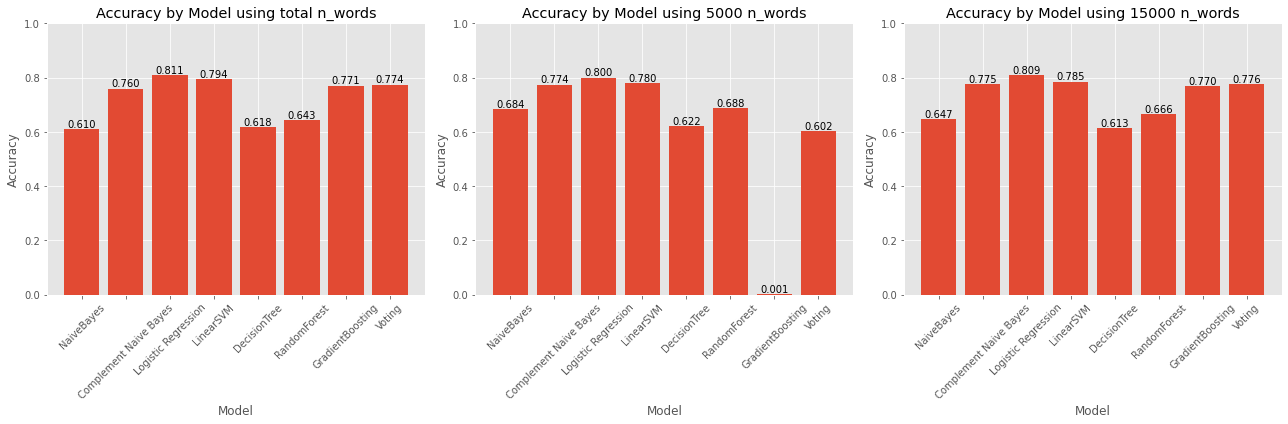

In [152]:
# 그래프 스타일 설정
plt.style.use('ggplot')  # 다른 스타일로 변경 가능

# 서브플롯 생성
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 각 데이터프레임의 그래프를 그리기
for ax, df, title in zip(axs, [acc_None, acc_5000, acc_15000], ['total n_words', '5000 n_words', '15000 n_words']):
    x_labels = df.columns
    y_values = df.iloc[0]
    
    bars = ax.bar(x_labels, y_values)
    
    ax.set_title(f'Accuracy by Model using {title}')
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1)  # y축 범위 설정
    ax.set_xticks(x_labels)  # x축 레이블 설정
    ax.set_xticklabels(x_labels, rotation=45)  # x축 레이블 회전
    
    # 막대 위에 값을 표시
    for bar, value in zip(bars, y_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # 그래프 간격 조절
plt.show()

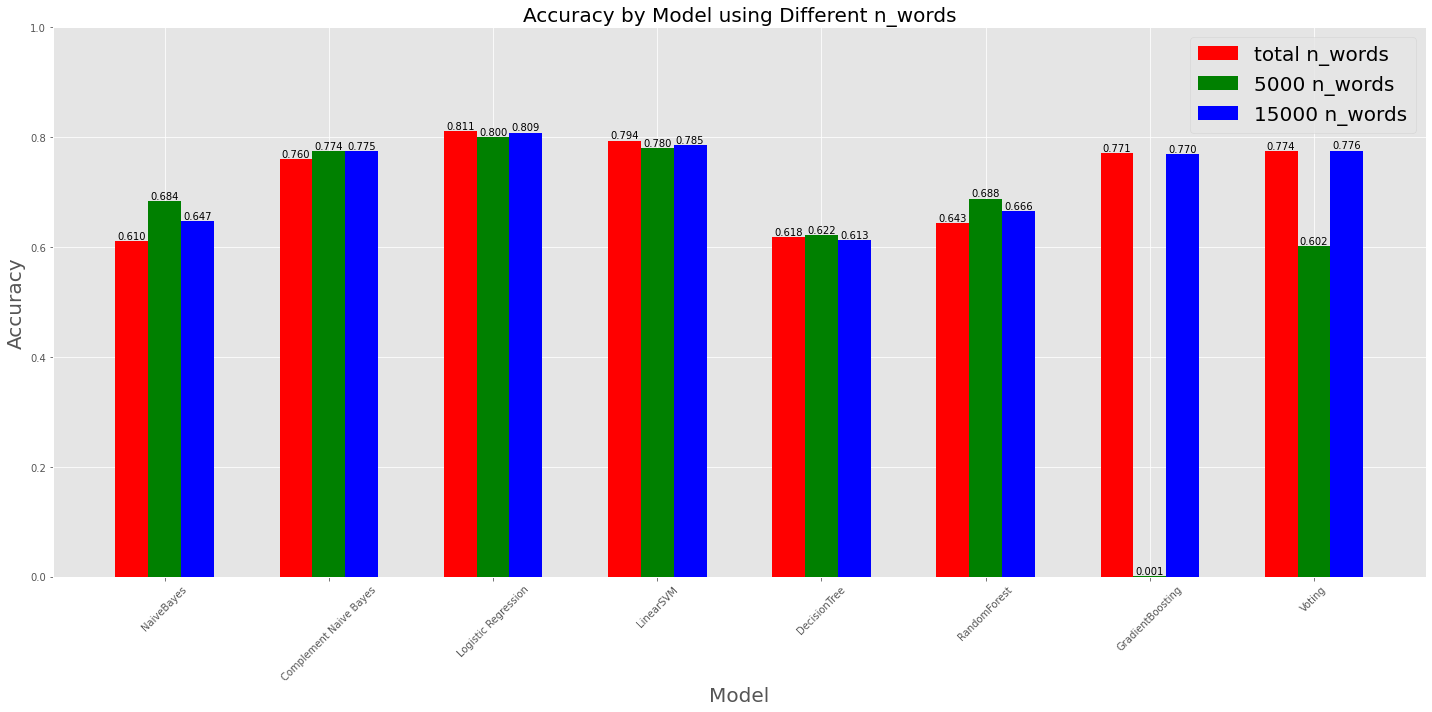

In [161]:


# 그래프 스타일 설정
plt.style.use('ggplot')  # 다른 스타일로 변경 가능

# 동일한 ax를 사용하여 그래프 그리기
fig, ax = plt.subplots(figsize=(20,10))

x_labels = acc_None.columns
width = 0.2  # 막대 그래프의 너비

# 각 데이터프레임의 그래프를 옆으로 위치하여 겹치지 않게 그리기
for i, (df, color, label) in enumerate(zip([acc_None, acc_5000, acc_15000], ['r', 'g', 'b'], ['total n_words', '5000 n_words', '15000 n_words'])):
    x_positions = [x + width * i for x in range(len(x_labels))]
    y_values = df.iloc[0]
    
    bars = ax.bar(x_positions, y_values, width=width, label=label, color=color)
    
    # 막대 위에 값을 표시
    for bar, value in zip(bars, y_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Accuracy by Model using Different n_words', fontsize=20)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_ylim(0, 1)  # y축 범위 설정
ax.set_xticks([x + width for x in range(len(x_labels))])
ax.set_xticklabels(x_labels, rotation=45)  # x축 레이블 회전
ax.legend(fontsize=20)

plt.tight_layout()  # 그래프 간격 조절
plt.show()


- 단어사전에서 5000개 단어를 사용한 경우 logistic regression 모델의 정확도가 0.8로 가장 높고 gradient boosting에서의 성능이 0.01로 가장 낮다.
- 5000개 단어를 사용한 gradient boosting의 accuracy가 현저히 낮은데 뭔가 오류가 있어보인다.
- 단어사전에서 15000개의 단어를 사용한 경우 logistic regression 모델의 정확도가 0.809로 가장 높고 decision tree에서의 성능이 0.613로 가장 낮다.
- 단어사전에서 전체 단어를 사용한 경우 logistic regression 모델의 정확도가 0.811로 가장 높고 naive bayes에서의 성능이 0.610로 가장 낮다.
- 전체 추세를 봤을 때 naive bayes, decision tree, random forest 모델의 정확도가 다른 모델들에 비해 약 0.2 포인트 낮다. 이때 5000개 단어를 사용한 경우의 정확도가 다른 개수의 단어를 사용했을 때보다 높다.단어 개수가 많아지면서 차원이 커져서 생긴 문제가 아닐까? 하는 생각이 든다.
- CNB, LR, GB, Voting의 경우 정확도가 높은 편이며 이때 단어사전을 15000개 또는 전부 사용한 경우가 단어를 5000개만 사용했을 때보다 항상 정확도가 높다.
- voting의 경우 5000개 단어만 사용했을 때와 그렇지 않은 경우 성능 차이가 큰 편이다.

In [133]:
f1_None.head()

,NaiveBayes,Complement Naive Bayes,Logistic Regression,LinearSVM,DecisionTree,RandomForest,GradientBoosting,Voting
0,[0. 0.40277778 0. 0.79619852 0...,[0.6 0.72131148 0.64516129 0.8758093 0...,[0.76190476 0.76995305 0.75 0.91987768 0...,[0.76190476 0.7627907 0.76923077 0.91075795 0...,[0. 0.53658537 0.55172414 0.70451237 0...,[0.19354839 0.44525547 0.17021277 0.83505155 0...,[0.58333333 0.70466321 0.66666667 0.89709443 0...,[0.63636364 0.71219512 0.66666667 0.90487805 0...


f1 score 그래프 그리고싶었는데 데이터 망해서 나중에 보완할 예정

In [169]:
feature_name = f1_None.columns
feature_name

Index(['NaiveBayes', 'Complement Naive Bayes', 'Logistic Regression',
       'LinearSVM', 'DecisionTree', 'RandomForest', 'GradientBoosting',
       'Voting'],
      dtype='object')

In [194]:
def flatten_list(input_list):
    output_list = []
    for sublist in input_list:
        output_list.extend(sublist)
    return output_list

## 딥러닝 모델 생성 및 성능 비교

In [204]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [211]:

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

# 각 리스트 안의 숫자들을 문자열로 변환하여 리스트에 저장
x_train = [' '.join([str(word) for word in doc]) for doc in x_train]

# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

# tf-idf 행렬 생성
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(x_train_dtm)
print(X_train.shape)

# test 데이터에 대해서도 적용
x_test = [' '.join([str(word) for word in doc]) for doc in x_test]
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM으로 변환
X_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-IDF 행렬로 변환


훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982, 4990)


In [215]:
labels = list(set(y_train))
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [218]:
from tensorflow.keras.utils import to_categorical

# 다중 분류를 위해 레이블을 원-핫 인코딩
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)


### RNN

In [224]:

# RNN 모델 구성
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=128))  # 임베딩 층
model.add(LSTM(64))  # LSTM 층
model.add(Dense(len(np.unique(labels)), activation='softmax'))  # 다중 분류 출력 층

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint 콜백 설정
checkpoint = ModelCheckpoint("best_model_rnn.h5", monitor='val_accuracy', save_best_only=True)

# 문서 시퀀스 패딩
X_train_padded = pad_sequences(X_train.toarray(), padding='post')
X_test_padded = pad_sequences(X_test.toarray(), padding='post')

# 모델 학습
history = model.fit(X_train_padded, y_train_onehot, epochs=100, batch_size=16, validation_data=(X_test_padded, y_test_onehot),
          callbacks=[early_stopping, checkpoint])

Epoch 1/100
562/562 [==============================] - 59s 102ms/step - loss: 2.4468 - accuracy: 0.3490 - val_loss: 2.4386 - val_accuracy: 0.3620
Epoch 2/100
562/562 [==============================] - 57s 101ms/step - loss: 2.4191 - accuracy: 0.3511 - val_loss: 2.4278 - val_accuracy: 0.3620
Epoch 3/100
562/562 [==============================] - 57s 101ms/step - loss: 2.4146 - accuracy: 0.3517 - val_loss: 2.4268 - val_accuracy: 0.3620
Epoch 4/100
562/562 [==============================] - 57s 101ms/step - loss: 2.4127 - accuracy: 0.3517 - val_loss: 2.4233 - val_accuracy: 0.3620
Epoch 5/100
562/562 [==============================] - 57s 102ms/step - loss: 2.4115 - accuracy: 0.3517 - val_loss: 2.4203 - val_accuracy: 0.3620
Epoch 6/100
562/562 [==============================] - 57s 101ms/step - loss: 2.4102 - accuracy: 0.3517 - val_loss: 2.4190 - val_accuracy: 0.3620
Epoch 7/100
562/562 [==============================] - 57s 101ms/step - loss: 2.4092 - accuracy: 0.3517 - val_loss: 2.4211 -

In [226]:
print(max(history.history['val_accuracy']))


0.36197686195373535


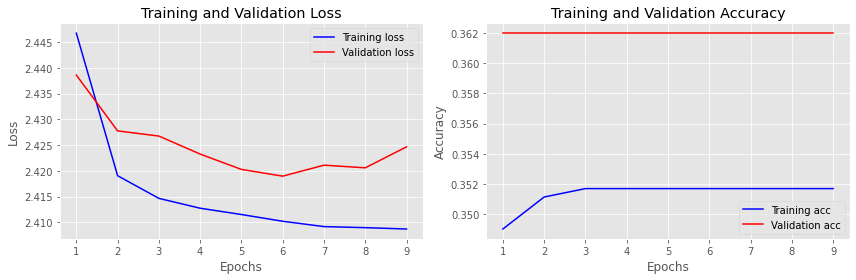

In [228]:
# history 객체로부터 손실 및 정확도 값 얻기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 에폭 수
epochs = range(1, len(train_loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

뭔가 이상한데 시간이 없어서 나중에 다시 보완할 예정이다.